# **EXPLANATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [ ]:
data_dummies = pd.get_dummies(data,dtype='int64')
print(data_dummies.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

In [ ]:
data_dummies.shape

(1338, 12)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [ ]:
X = data.drop('charges',axis=1)
y = data['charges']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)
print(y_pred)

[ 1.55319667e+04  9.51619844e+03  2.83341303e+04  5.36165725e+03
  1.14977191e+04  1.12770325e+04  2.84818292e+03  2.22248819e+03
  4.45419112e+03  8.81101145e+03  8.71714119e+03  1.35995111e+04
  1.33444996e+04  2.99293763e+04  1.37720291e+04  3.10510278e+04
  1.50832570e+04  1.72526684e+03  3.36403616e+04  3.67784399e+04
  3.34411743e+04  4.11934013e+04  3.17252957e+03  1.01712572e+04
 -5.35325945e+01  9.59185567e+03  1.64327524e+04  6.57095072e+03
  1.47513939e+04 -5.19679604e+02  9.28219974e+03  1.64996937e+04
  5.29474627e+03  3.76431146e+03  6.93573633e+03  1.14603044e+04
  1.77348674e+04  7.02628562e+03  9.83898680e+03  1.16517139e+04
  7.12601669e+03  7.95848427e+03  5.41639869e+03  3.18049796e+04
  7.37291174e+03  2.38865923e+03  1.31400244e+04  1.39119932e+04
  1.46154279e+04  9.43537877e+03  1.28432468e+04  1.11711223e+04
  2.73020882e+04  1.15288421e+04  1.42796256e+04  6.31439797e+03
  3.19993033e+04  2.82742869e+04  3.85495351e+04  6.55096839e+03
  1.64136464e+04  9.57496

In [ ]:
print(mean_absolute_error(y_test,y_pred))

4199.3349698042575


In [ ]:
print(mean_squared_error(y_test,y_pred))

33913914.85714985


In [ ]:
print(r2_score(y_test,y_pred))

0.7626072475418817


In [ ]:
df_comparacion = pd.DataFrame({'Real':y_test,'Prediccion':y_pred, 'Age':X_test['age'],'BMI':X_test['bmi']})

In [ ]:
df_comparacion.head()

,Real,Prediccion,Age,BMI
650,9800.88820,15531.966721,49,42.680
319,4667.60765,9516.198445,32,37.335
314,34838.87300,28334.130309,27,31.400
150,5125.21570,5361.657249,35,24.130
336,12142.57860,11497.719059,60,25.740


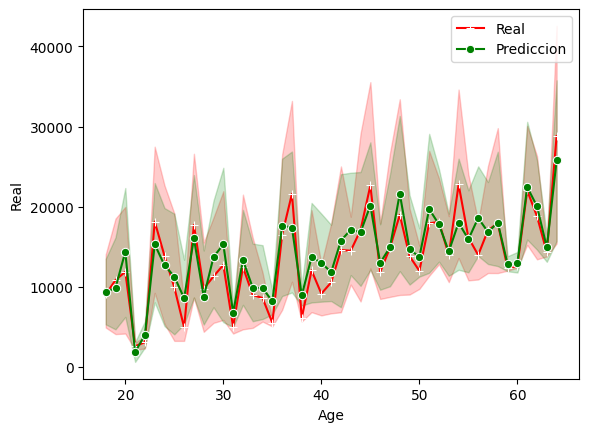

In [ ]:
sns.lineplot(data=df_comparacion,x='Age',y='Real',marker='+',c='r',label='Real')
sns.lineplot(data=df_comparacion,x='Age',y='Prediccion',marker='o',c='g',label='Prediccion')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import d2_absolute_error_score

In [ ]:
print(d2_absolute_error_score(y_test,y_pred))

0.48680022363166187


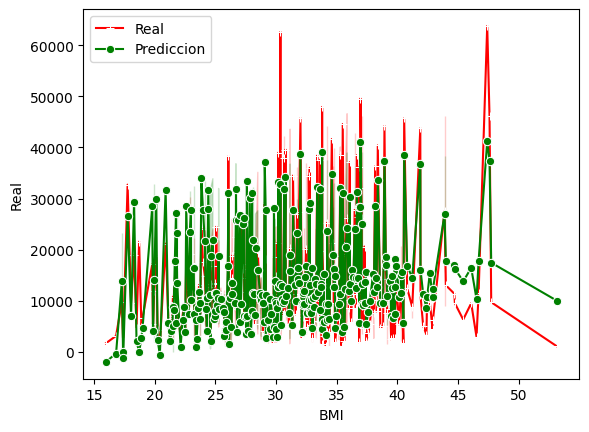

In [ ]:
sns.lineplot(data=df_comparacion,x='BMI',y='Real',marker='+',c='r',label='Real')
sns.lineplot(data=df_comparacion,x='BMI',y='Prediccion',marker='o',c='g',label='Prediccion')
plt.legend()
plt.show()

In [ ]:
coeficientes = lr.coef_
intercepto = lr.intercept_

In [ ]:
list(zip(X_train.columns,lr.coef_))

[('age', 3633.969308480603),
 ('sex', -44.7120946622008),
 ('bmi', 2030.7729127149053),
 ('children', 585.347641020916),
 ('smoker', 9439.456980355015),
 ('region', 424.1415025376928)]

In [ ]:
print(intercepto)

13225.435255587607


# **EXERCISE**

## Preprocessing

### Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

### Data

In [89]:
data = pd.read_csv('kc_house_data_linear_regression.csv')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Variables

##### Years since built

In [91]:
data['yr_since_built'] = 2024 - data['yr_built']

##### Renovated

In [92]:
data['renovated'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

### Imputación de valores nulos

In [93]:
data = data.fillna(0) # sqft_above tenía 2 valores nulos, por lo que se eliminan

### Train y test split

In [94]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_since_built',
       'renovated'],
      dtype='object')

In [95]:
x = data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15','yr_since_built',
       'renovated','yr_renovated']]

y = data['price']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)

### Escalamiento

In [97]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train) # Se entrena y se transforma
x_test_sc = sc.transform(x_test) # NO se entrena porque es data de test

## Modelos

### Linear regression

In [98]:
lr = LinearRegression()
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)
print(y_pred)

[603475.24765383 463605.79603962 958348.64026935 ... 891023.56259307
 570819.70237804 594007.76535727]


#### Evaluación modelo

In [99]:
print(mean_absolute_error(y_test,y_pred))

126538.77512730635


In [100]:
print(mean_squared_error(y_test,y_pred))

39944266131.12806


In [101]:
print(r2_score(y_test,y_pred))

0.7058587644628369


In [102]:
x_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,yr_since_built,renovated,yr_renovated
5506,4,2.50,2490,8750,2.0,0,0,3,8,2040.0,450,47.5931,-122.116,2120,10240,48,0,0
9279,2,1.00,1480,4080,1.0,0,0,3,7,1050.0,430,47.6842,-122.393,1310,4080,75,0,0
16034,3,2.50,3750,7821,2.0,0,0,3,9,3750.0,0,47.6325,-122.064,3210,8405,23,0,0
6608,4,3.25,3530,20012,2.0,0,0,3,11,3530.0,0,47.7193,-122.127,3850,20707,38,0,0
20359,4,2.50,2009,4800,2.0,0,0,3,8,2009.0,0,47.2586,-122.200,1798,4800,12,0,0


In [103]:
df_comparacion = pd.DataFrame({'Real':y_test,'Prediccion':y_pred, 'Bedrooms':x_test['bedrooms'],'Floors':x_test['floors']})

In [104]:
df_comparacion.head()

,Real,Prediccion,Bedrooms,Floors
5506,532500.0,6.034752e+05,4,2.0
9279,410000.0,4.636058e+05,2,1.0
16034,782500.0,9.583486e+05,3,2.0
6608,995000.0,1.227028e+06,4,2.0
20359,279000.0,2.602979e+05,4,2.0


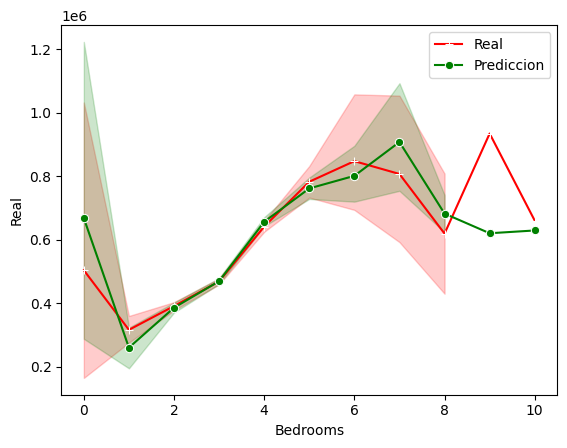

In [105]:
sns.lineplot(data=df_comparacion,x='Bedrooms',y='Real',marker='+',c='r',label='Real')
sns.lineplot(data=df_comparacion,x='Bedrooms',y='Prediccion',marker='o',c='g',label='Prediccion')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import d2_absolute_error_score

In [107]:
print(d2_absolute_error_score(y_test,y_pred))

0.43780904108970886


In [108]:
coeficientes = lr.coef_
intercepto = lr.intercept_

In [109]:
list(zip(x_train.columns,lr.coef_))

[('bedrooms', -30326.700940173454),
 ('bathrooms', 30466.135305938136),
 ('sqft_living', 131181.47130948608),
 ('sqft_lot', 6601.235878321774),
 ('floors', -813.0025880768703),
 ('waterfront', 53743.3090896362),
 ('view', 36624.8325551343),
 ('condition', 20491.492424249118),
 ('grade', 118270.95616550665),
 ('sqft_above', 27878.069795107473),
 ('sqft_basement', -410.48133420145416),
 ('lat', 77297.43002270746),
 ('long', -17311.552236246145),
 ('sqft_living15', 18007.073240282465),
 ('sqft_lot15', -11147.867938279947),
 ('yr_since_built', 73326.99696106126),
 ('renovated', -1419435.6926440282),
 ('yr_renovated', 1427975.7588698105)]

In [110]:
print(intercepto)

539183.682199748
